In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML;

# $k$-means

<center>

<img src="figs/L6-John_Snow_memorial_and_pub.png" alt="Figure" width="400px">
    
</center>

<div style = "float: left; width: 55%;">
    
__1854__ saw a horrific cholera outbreak in Soho, London.   

Common wisdom at the time was that disease spread by breathing "foul air" (miasma).  
    
The London sewer system had not yet reached Soho.  Most homes had cesspits under the floor.

John Snow, a local physician, extensively studied the patterns of illness across Soho due to cholera.
    
</div>

<img src="figs/L06-John-Snow-Portrait.png" alt="Figure" width="30%" float = "right">

In the course of his studies, his attention was drawn to one neighborhood around Broad Street.

In 10 days, 500 people in the area died. 

In uncovering the source of this outbreak, Snow prepared this map:

<center>
    
<img src="figs/L6-Snow-cholera-map-1.png" alt="Figure" width="500px">
    
</center>

By John Snow - Published by C.F. Cheffins, Lith, Southhampton Buildings, London, England, 1854 in Snow, John. On the Mode of Communication of Cholera, 2nd Ed, John Churchill, New Burlington Street, London, England, 1855.

(This image was originally from <a class="external text" href="http://en.wikipedia.org">en.wikipedia</a>; description page is/was <a class="external text" href="http://en.wikipedia.org/w/index.php?title=Image%3ASnow-cholera-map-1.jpg">here</a>. Image copied from <a rel="nofollow" class="external free" href="http://matrix.msu.edu/~johnsnow/images/online_companion/chapter_images/fig12-5.jpg">http://matrix.msu.edu/~johnsnow/images/online_companion/chapter_images/fig12-5.jpg</a>), Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=2278605">https://commons.wikimedia.org/w/index.php?curid=2278605</a>

<center>
    
<img src="figs/L6-John_Snow_memorial_and_pub.png" alt="Figure" width="400px">


</center>

<a href="http://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=357998">https://commons.wikimedia.org/w/index.php?curid=357998</a>

John Snow's original data is available here: http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/

## Clustering is Unsupervised Learning

Clustering is a very important way of discovering __structure__ in data.

It is so important because it is __common__ for data to show clusters.

* Locations where millionaires live
* The number of hours people work each week
* Demographics ("soccer moms", "bored retirees", "unemployed millenials", etc)


We can often simplify or compress our data if we recognize the existence of clusters.

Further, we can often interpret clusters by assigning them labels.

However, note that these categories or "labels" are assigned __after__ the fact.

And, we may __not__ be able to interpret clusters or assign them labels in some cases.

That is, clustering represents the first example we will see of __unsupervised__ learning.

__Supervised__ methods:  Data items have labels, and we want to learn a function that correctly assigns labels to new data items.

__Unsupervised__ methods:  Data items do not have labels, and we want to learn a function that extracts  important patterns from the data.

__Applications of Clustering:__

* Image Processing
    * Cluster images based on their visual content
    * Compress images based on color clusters
* Web Mining
    * Cluster groups of users based on webpage access patterns
    * Cluster web pages based on their content
* Bioinformatics
    * Cluster similar proteins together (by structure or function)
    * Cluster cell types (by gene activity)
* And many more ...

## The Clustering Problem

When we do clustering, what problem are we trying to solve?

We will answer this question informally at first. 

(But soon we will look at formal criteria!)

Informally, a __clustering__ is:
    
> a grouping of data objects, such that the objects within a group are similar (or near) to one another and dissimilar (or far) from the objects in other groups.

(keep in mind that if we use a distance function as a dissimilarity measure, then "far" implies "different")

<center>
    
<img src="figs/L06-clustering-1.png" alt="Figure" width="350px">
    
</center>

So we want our clustering algorithm to:
* <font color = "blue">minimize</font> intra-cluster distances
* <font color = "red">maximize</font> inter-cluster distances

Here are the basic questions we need to ask about clustering:
    
* What is the right kind of <font color = "blue">"similarity"</font> to use?
* What is a <font color="blue">"good" partition</font> of objects?
    * ie, how is the quality of a solution measured?
* <font color = "blue">How to find</font> a good partition?
    * are there efficient algorithms?  
    * are there algorithms that are guaranteed to find good clusters?

Now note that even with our more-formal discussion, the criteria for deciding on a "best" clustering can still be ambiguous.

<center>
    
<img src="figs/L06-clustering-2.png" alt="Figure" width="600px">
    
</center>

To accommodate the ambiguity here, one approach is to seek a __hierarchical__ clustering:

That is, as set of nested clusters organized in a tree.

We'll discuss hierarchical cluster in an upcoming lecture.

For today, we'll focus on __partitional__ clustering:  

in a partitional clustering, the points are divided into a set of __non-overlapping__ groups.

<center>
    
<img src="figs/L06-partitional-clustering.png" alt="Figure" width="600px">
    
</center>

In a partitional clustering:
* Each object belongs to __one__, and only one, cluster
* The set of clusters covers all the objects

We are going to assume for now that the number of clusters is given in advance.

We will denote the number of clusters as $k$.

## The $k$-means Problem

Now, we are ready to state our first formalization of the clustering problem.

We will assume that 
* data items are represented by points in $\mathbb{R}^d$.   (In other words, each data item has $d$ features.)
* $n$ points are given
* the number of clusters $k$ is given

__$k$-means Problem:__

Find $k$ points $c_1, \dots, c_k$ (called <font color="blue"> _centers_, _centroids_,</font> or <font color = "blue"> _means_,</font> so that the cost

$$ \sum_{i=1}^n \min_k \Vert x_i-c_j\Vert^2_2 $$

is minimized.

__Equivalently:__ we can think in terms of the partition itself.

Consider the set $X = \{x_1, \dots, x_n\}$ where $x_i \in \mathbb{R}^n$.
    
Find $k$ points $c_1, \dots, c_k$ 

and partition $X$ into subsets $\{X_1, \dots, X_k\}$ by assigning each point $x_i$ in $X$ to its nearst cluster center,

so that the cost

$$ \sum_{i=1}^n \min_j \Vert x_i-c_j\Vert^2_2 = \sum_{j=1}^k \sum_{x \in X_j} \Vert x - c_j \Vert^2_2 $$

is minimized.

We now have a <font color="blue">formal</font> definition of a clustering.

This is not the only definition possible, but it is an intuitive and simple one.

How hard is it to solve this problem?

* $k=1$ and $k=n$ are easy special cases (why?)
* But, this problem is __NP-hard__ if the dimension of the data is at least 2
    * We don't expect that there is any exact, efficient algorithm in general 

__Nonetheless,__ there is a simple algorithm that works quite well in practice!

## The $k$-means Algorithm

There is a "classic" algorithm for this problem.

It was voted among the __top-10 algorithms__ in data mining!

It is such a good idea that it has been independently discovered multiple times.

It was first discovered by Lloyd in 1957, so it is often called Lloyd's algorithm.

It is called the "$k$-means algorithm"

(not to be confused with the $k$-means problem!)

<center>
    
<img src="figs/L06-top-ten-algorithms-cover.png" alt="Figure" width="300px">
    
</center>

The $k$-means algorithm:

1. Pick $k$ cluster centers $\{c_1, \dots, c_k\}$.  These can be chosen randomly, or by some other method.
2. For each $j$, define the cluster $X_j$ as the set of points in $X$ that are <font color="blue">closest to center</font> $c_k$.  
(Nearer to $c_k$ than to any other center.)
3. For each $j$, let $c_j$ be <font color="blue">the center of mass of cluster</font> $X_j$.  
(In other words, $c_j$ is the mean of the vectors in $X_j$.)
4. Repeat (ie, go to Step 2) until convergence.

Let's see this in practice:

<center>
    
<img src="figs/L06-kmeans-example.png" alt="Figure" width="600px">
    
</center>

## Limitations of $k$-means

As you can see, $k$-means can work very well.

However, we don't have any guarantees on the performance of $k$-means.

In particular, there are various settings in which $k$-means can fail to do a good job.

1. __$k$-means tries to find spherical clusters__.

Because each point is assigned to its closest center, the points in a cluster are implicitly assumed to be arranged in a sphere around the center.

<center>
    
<img src="figs/L06-kmeans-nonspherical-clusters.png" alt="Figure" width="600px">
    
</center>

2. __$k$-means tries to find equal-sized clusters.__

For the same reason, the sizes of clusters are implicitly assumed to be approximately equal.

<center>
    
<img src="figs/L06-kmeans-cluster-size.png" alt="Figure" width="600px">
    
</center>

3. __$k$-means is sensitive to the starting cluster centers.__

If the initial guess (Step 1) is a bad one, $k$-means may get "stuck" in a bad solution.


<center>
    
<img src="figs/L06-kmeans-bad-initialization.png" alt="Figure" width="600px">
    
</center>

### Choosing a Good Initialization

How can we avoid the kind of bad initialization we just saw?

A good strategy is to pick points that are distant to each other.

This strategy is called "$k$-means++".  

It works very well in practice, and the `scikit-learn` implementation uses it by default.

(We will explore it in the next lecture.)

### Choosing the right $k$

Generally, we would say that, given some $k$, the $k$-means algorithm "learns" the cluster centers -- that is, the parameters of the model.

But we have not yet considered how to choose the right number of clusters.

That's typically __not__ something one knows in advance.

As an aside:
* This parameter ($k$) is the first example we have seen of a __hyperparameter__.
* A hyperparameter is a parameter that must be set before the model parameters can be learned.

Our basic strategy will be to
* Iterate through different $k$ and use some criterion to decide which $k$ is most appropriate.
* We will discuss this more in the next lecture.

### Feature Scaling

Finally, given the tendency of $k$-means to look for spherical clusters, we should consider the scales of the various features.

In fact, in general when constructing or selecting a distance metric, one needs to think carefully about the scale of the features being used.

For example, consider the case where we are clustering people based on their age, income, and gender.

We might use age in years, income in dollars, and assign gender to the values $\{0, 1\}$.

Thus, the following records:

* Joe Smith, age 27, income USD 75,000, male
* Eve Jones, age 45, income USD 42,000, female

Would be encoded in feature space as:

$$\begin{bmatrix}27\\75000\\0\end{bmatrix},\begin{bmatrix}45\\42000\\1\end{bmatrix} $$

What would happen if we used Euclidean distance as our dissimilarity metric in this feature space?

(This is what $k$-means uses.)

Clearly, the influence of income would dominate the other two features.  For example, a difference of gender is about as significant as a difference of one dollar of yearly income.

We are unlikely to expose gender-based differences if we cluster using this representation.

The most common way to handle this is __feature scaling.__

The basic idea is to rescale each feature separately, so that its range of values is about the same as all other features.

For example, one may choose to:
    
* shift each feature independently by subtracting the mean over all observed values
    * This means that each feature is now centered on zero
* then rescale each feature so that the standard deviation overall observed values is 1.
    * This means that the feature will have about the same range of values as all the others.

For example, let's work with Bortkiewicz's famous horse-kick data:

In [2]:
# source: http://www.randomservices.org/random/data/HorseKicks.html
import pandas as pd
df = pd.read_table('data/HorseKicks.txt',index_col='Year',dtype='float')
counts = df.sum(axis=1)
counts

Year
1875.0     3.0
1876.0     5.0
1877.0     7.0
1878.0     9.0
1879.0    10.0
1880.0    18.0
1881.0     6.0
1882.0    14.0
1883.0    11.0
1884.0     9.0
1885.0     5.0
1886.0    11.0
1887.0    15.0
1888.0     6.0
1889.0    11.0
1890.0    17.0
1891.0    12.0
1892.0    15.0
1893.0     8.0
1894.0     4.0
dtype: float64

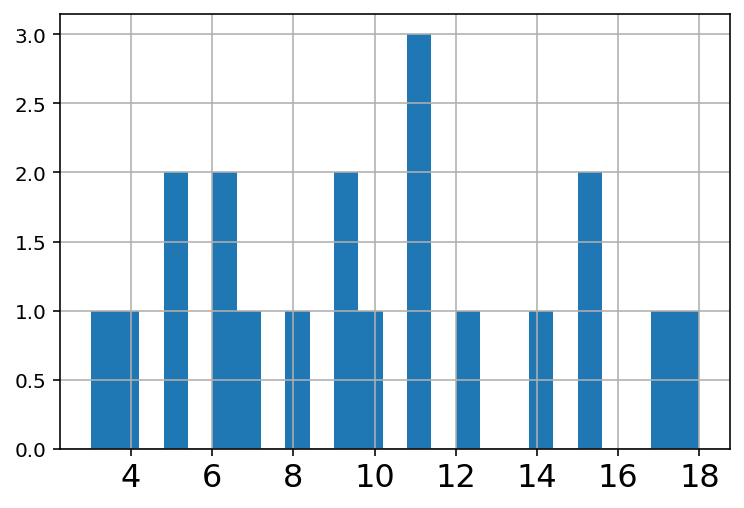

In [3]:
counts.hist(bins=25,xlabelsize=16);

In [4]:
counts.mean()

9.8

To standardize to zero mean and unit standard deviation, we can use tools from the `scikit-learn` library.

(We will discuss scikit-learn more in upcoming lectures.)

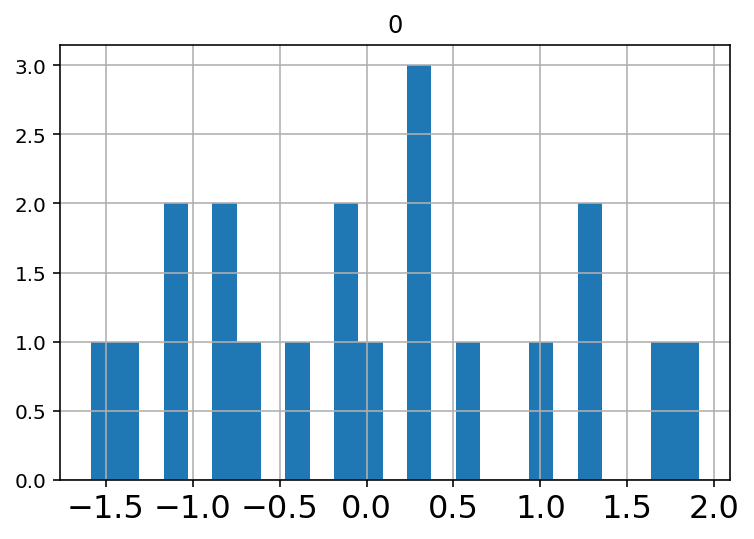

In [5]:
from sklearn import preprocessing
counts_scaled = pd.DataFrame(preprocessing.scale(counts))
counts_scaled.hist(bins=25,xlabelsize=16);

In [6]:
counts_scaled.mean().values

array([-1.77635684e-16])

Notice that values that used to be zero have now become negative.

In some situations it may not be sensible to change zeros into something else.  It may make more sense to map all values into a fixed range, for example $[0, 1]$.

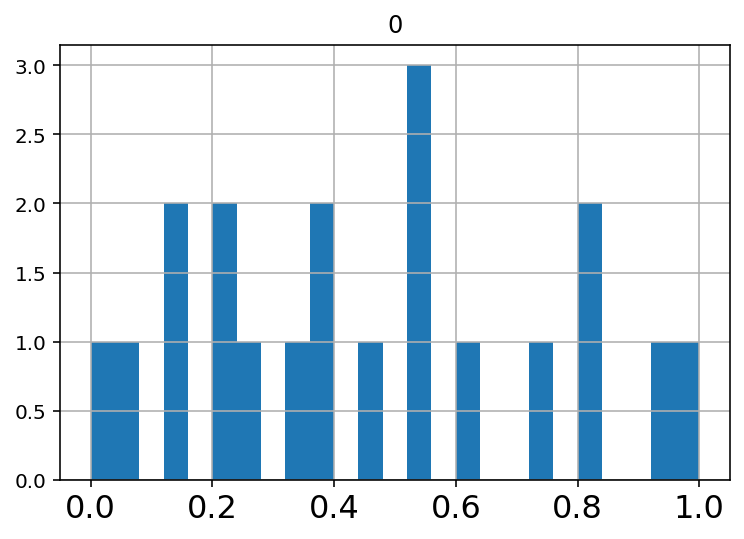

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
counts_minmax = min_max_scaler.fit_transform(counts.values.reshape(-1,1))
counts_minmax = pd.DataFrame(counts_minmax)
counts_minmax.hist(bins=25,xlabelsize=16);

__Example Application of k-means.__

Here is a simple example of how $k$-means can be used for data compression.

Consider the following image.  Each color in the image is represented by an integer.  Typically we might use 24 bits for each integer (8 bits for R, G, and B).


<center>
    
<img src="figs/L6-annie19980405.jpg" alt="Figure" width="350px">
    
</center>

Now cluster the pixels by their color value, and replace each pixel by its cluster center.

Because there are a smaller number of colors used, we can use fewer bits for each pixel.

Here, we use 4 bits (16 colors) for a compression ratio around 6$\times$.

<center>
    
<img src="figs/L6-annie_016.png" alt="Figure" width="500px">
    
</center>

Here, we use 3 bits (8 colors) for a compression ratio around 8$\times$.

<center>
    
<img src="figs/L6-annie_008.png" alt="Figure" width="500px">
    
</center>

Here, we use 2 bits (4 colors) for a compression ratio around 12$\times$.

<center>
    
<img src="figs/L6-annie_004.png" alt="Figure" width="500px">
    
</center>

Finally, we use 1 bit (2 colors) for a compression ratio around 24$\times$.

<center>
    
<img src="figs/L6-annie_002.png" alt="Figure" width="500px">
    
</center>